### Import all essential libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


import scipy
from scipy import stats
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')

### Reading given data, present in .txt format

In [2]:
df =pd.read_table('C:/Users/Administrator/Downloads/DSP_Capstone Project-20200730T123804Z-001/DSP_Capstone Project/Python Project/XYZCorp_LendingData.txt')

### Viewing top 50 records of data

In [3]:
df.head(50)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.40,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.90,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,Dec-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.60,11.0,f,1

In [4]:

df = pd.DataFrame(df)

In [5]:
df.shape

(855969, 73)

### To check categorical variables

In [6]:
df.dtypes == "object"
b = df.dtypes[df.dtypes == "object"].index
b
df[b].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint
count,855969,855969,855969,806526,812908,855969,855969,855969,855969,121812,855969,855936,855969,855969,855969,855969,847107,602998,855919,855969,442
unique,2,7,35,290912,11,6,3,103,2,120335,14,60991,931,51,697,2,97,3,102,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2015,n,,debt_consolidation,Debt consolidation,945xx,CA,Aug-2001,f,Jan-2016,Feb-2016,Jan-2016,INDIVIDUAL,Not Verified
freq,600221,247998,54958,12965,282090,429106,318178,48212,855964,231,505392,398089,9466,125172,6433,442555,467510,534094,701687,855527,252


### To check Numerical  variables

In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,0.680915,34.149943,70.463959,11.542447,0.194537,1.691053e+04,55.019405,25.269269,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,2225.985295,0.014230,44.101450,1.0,107412.163982,18.318477,0.004944,2.254129e+02,1.397662e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.541391,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,0.964033,21.868500,27.827120,5.308094,0.581585,2.222374e+04,23.811585,11.818841,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,4864.966593,0.133712,22.164907,0.0,47987.608637,7.221855,0.077333,1.048945e+04,1.539385e+05,1.206939,3.080330,0.986169,1.685394,26.739237,42492.757796,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,285.420000,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900000,24.000000,6290.250000,6287.650000,4976.160000,4948.25000,3286.890000,1076.910000,0.000000,0.000000,0.000000,468.820000,0.000000,44.000000,1.0,100000.000000,17.735000,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.0

### Check vaiable wise missing, Percentage missing and datatype

In [8]:
pd.pandas.set_option('display.max_rows', None)
missing_value_cnt = df.isnull().sum()
percentage = 100 * df.isnull().sum() / len(df)
data_types = df.dtypes
missing_values_table = pd.concat([missing_value_cnt.sort_values(ascending=False), percentage, data_types], axis=1 , sort= False)
print(missing_values_table)

                                  0          1        2
dti_joint                    855529  99.948596  float64
verification_status_joint    855527  99.948363   object
annual_inc_joint             855527  99.948363  float64
il_util                      844360  98.643759  float64
mths_since_rcnt_il           843035  98.488964  float64
total_bal_il                 842681  98.447607  float64
inq_last_12m                 842681  98.447607  float64
open_acc_6m                  842681  98.447607  float64
open_il_6m                   842681  98.447607  float64
open_il_24m                  842681  98.447607  float64
open_il_12m                  842681  98.447607  float64
open_rv_12m                  842681  98.447607  float64
open_rv_24m                  842681  98.447607  float64
max_bal_bc                   842681  98.447607  float64
all_util                     842681  98.447607  float64
inq_fi                       842681  98.447607  float64
total_cu_tl                  842681  98.447607  

### Drop variables having more than 80 percent missing value

In [9]:
df = df.drop(columns= ["dti_joint", "verification_status_joint", "annual_inc_joint", "il_util",
                           "mths_since_rcnt_il", "total_bal_il" , "inq_last_12m", "open_acc_6m", "open_il_6m",
                           "open_il_24m", "open_il_12m", "open_rv_12m", "open_rv_24m", "max_bal_bc",
                           "all_util","inq_fi","total_cu_tl","desc","mths_since_last_record"]) 

### Missing values after deleting variables having more than 80 percent missing values

In [10]:
pd.pandas.set_option('display.max_rows', None)
missing_value_cnt = df.isnull().sum()
percentage = 100 * df.isnull().sum() / len(df)
data_types = df.dtypes
missing_values_table = pd.concat([missing_value_cnt.sort_values(ascending=False), percentage, data_types], axis=1 , sort= False)
print(missing_values_table)

                                  0          1        2
mths_since_last_major_derog  642830  75.099682  float64
mths_since_last_delinq       439812  51.381767  float64
next_pymnt_d                 252971  29.553757   object
tot_cur_bal                   67313   7.863953  float64
tot_coll_amt                  67313   7.863953  float64
total_rev_hi_lim              67313   7.863953  float64
emp_title                     49443   5.776261   object
emp_length                    43061   5.030673   object
last_pymnt_d                   8862   1.035318   object
revol_util                      446   0.052105  float64
collections_12_mths_ex_med       56   0.006542  float64
last_credit_pull_d               50   0.005841   object
title                            33   0.003855   object
annual_inc                        0   0.000000  float64
purpose                           0   0.000000   object
pymnt_plan                        0   0.000000   object
issue_d                           0   0.000000  

### Code to check no outliers in each variable

In [11]:

df1=df._get_numeric_data()
q1= df1.quantile(0.25)
q3= df1.quantile(0.75)
iqr= q3-q1
((df1<(q1 - 1.5*iqr))| (df1>(q3 + 1.5*iqr))).sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                         5918
installment                     22410
annual_inc                      38304
dti                                70
delinq_2yrs                    163284
inq_last_6mths                  49842
mths_since_last_delinq            154
open_acc                        26338
pub_rec                        130514
revol_bal                       46665
revol_util                         44
total_acc                       17444
out_prncp                        3661
out_prncp_inv                    3648
total_pymnt                     44450
total_pymnt_inv                 44482
total_rec_prncp                 56641
total_rec_int                   61641
total_rec_late_fee               9974
recoveries                      24187
collection_recovery_fee         23035
last_pymnt_a

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(579116, 54)


#### no. of outliers are so many and IQR method is not efficient to deal with this problem

### Data Encoding

In [13]:
a=df

In [14]:

df['verification_status'] = df['verification_status'].map({'Source Verified': 1 ,'Verified': 1,'Not Verified':0})
df['application_type'] = df['application_type'].map({'INDIVIDUAL': 0 ,'JOINT': 1})
df['initial_list_status'] = df['initial_list_status'].map({'f':0,'w':1})
df['pymnt_plan'] = df['pymnt_plan'].map({'n':0,'y':1})
df["emp_length"] = df["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
df["term"] = df["term"].replace({"months": ''} , regex = True)

### Decode date format of                                                                                                                                  from  Jan-2015  to 2015Jan

In [15]:
df['issue_d']= df['issue_d'].str[ -4:] + df['issue_d'].str[ :3] 
df['earliest_cr_line']= df['earliest_cr_line'].str[ -4:] + df['earliest_cr_line'].str[ :3] 
df['last_pymnt_d']= df['last_pymnt_d'].str[ -4:] + df['last_pymnt_d'].str[ :3]
df['last_credit_pull_d']= df['last_credit_pull_d'].str[ -4:] + df['last_credit_pull_d'].str[ :3]

### Decode date format of                                                                                                                                  from 2015Jan to 201501

In [16]:
df["issue_d"] = df["issue_d"].replace({"Jan": '01', "Feb": '02', "Mar": '03', "Apr": '04', "May": '05', "Jun": '06', "Jul": '07', "Aug": '08', "Sep": '09', "Oct": '10', "Nov": '11', "Dec": '12'} , regex = True)
df["earliest_cr_line"] = df["earliest_cr_line"].replace({"Jan": '01', "Feb": '02', "Mar": '03', "Apr": '04', "May": '05', "Jun": '06', "Jul": '07', "Aug": '08', "Sep": '09', "Oct": '10', "Nov": '11', "Dec": '12'} , regex = True)
df["last_pymnt_d"] = df["last_pymnt_d"].replace({"Jan": '01', "Feb": '02', "Mar": '03', "Apr": '04', "May": '05', "Jun": '06', "Jul": '07', "Aug": '08', "Sep": '09', "Oct": '10', "Nov": '11', "Dec": '12'} , regex = True)
df["last_credit_pull_d"] = df["last_credit_pull_d"].replace({"Jan": '01', "Feb": '02', "Mar": '03', "Apr": '04', "May": '05', "Jun": '06', "Jul": '07', "Aug": '08', "Sep": '09', "Oct": '10', "Nov": '11', "Dec": '12'} , regex = True)

### imputing missing values for mths_since_last_major_derog & mths_since_last_delinq(by max value as they never delinquced )

In [17]:
df.mths_since_last_major_derog.fillna(188, inplace= True)
df.mths_since_last_delinq.fillna(188 , inplace= True)


### imputing missing values for last_pymnt_d, last_credit_pulled_d & emp_length(by min value as they never cases of never paid and not employeed )

In [18]:
df.last_pymnt_d.fillna('200801', inplace= True)
df.last_credit_pull_d.fillna('200705', inplace= True)
df.emp_length.fillna(0, inplace= True)

### imputing remaining values by mean

In [19]:
col = ['tot_cur_bal', 'tot_coll_amt', 'total_rev_hi_lim', 'revol_util', 'collections_12_mths_ex_med']
for col in col:
    print('Imputation with median: %s' % (col))
    df[col].fillna(df[col].median(), inplace = True)

Imputation with median: tot_cur_bal
Imputation with median: tot_coll_amt
Imputation with median: total_rev_hi_lim
Imputation with median: revol_util
Imputation with median: collections_12_mths_ex_med


### Convert these datatypes to integer

In [20]:
df['emp_length'] = df.emp_length.astype(int)
df['last_pymnt_d'] = df.emp_length.astype(int)
df['last_credit_pull_d'] = df.emp_length.astype(int)
df['last_pymnt_d'] = df.emp_length.astype(int)
df['earliest_cr_line'] = df.emp_length.astype(int)


In [21]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,1,201112,0,credit_card,Computer,860xx,AZ,27.65,0.0,10,1.0,188.0,3.0,0.0,13648.0,83.7,9.0,0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,10,171.62,NaN,10,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
1,1077430,1314167,2500.0,2500.0,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,1,201112,0,car,bike,309xx,GA,1.00,0.0,1,5.0,188.0,3.0,0.0,1687.0,9.4,4.0,0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1,119.66,NaN,1,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,1
2,1077175,1313524,2400.0,2400.0,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,0,201112,0,small_business,real estate business,606xx,IL,8.72,0.0,10,2.0,188.0,2.0,0.0,2956.0,98.5,10.0,0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,10,649.91,NaN,10,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
3,1076863,1277178,10000.0,10000.0,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,1,201112,0,other,personel,917xx,CA,20.00,0.0,10,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,10,357.48,NaN,10,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
4,1075358,1311748,3000.0,3000.0,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,1,201112,0,other,Personal,972xx,OR,17.94,0.0,1,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1,67.79,Feb-2016,1,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
5,1075269,1311441,5000.0,5000.0,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,1,201112,0,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,3,3.0,188.0,9.0,0.0,7963.0,28.3,12.0,0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,3,161.03,NaN,3,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
6,1069639,1304742,7000.0,7000.0,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,0,201112,0,debt_consolidation,Loan,280xx,NC,23.51,0.0,8,1.0,188.0,7.0,0.0,17726.0,85.6,11.0,0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,8,170.08,Feb-2016,8,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
7,1072053,1288686,3000.0,3000.0,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,1,201112,0,car,Car Downpayment,900xx,CA,5.35,0.0,9,2.0,188.0,4.0,0.0,8221.0,87.5,4.0,0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,9,111.34,NaN,9,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0
8,1071795,1306957,5600.0,5600.0,5600.0,60,21.28,152.39,F,F2,NaN,4,OWN,40000.0,1,201112,0,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0.0,4,2.0,188.0,11.0,0.0,5210.0,32.6,13.0,0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,4,152.39,NaN,4,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,1
9,1071570,1306721,5375.0,5375.0,5350.0,60,12.69,121.45,B,B5,Starbucks,1,RENT,15000.0,1,201112,0,other,Building my credit history.,774xx,TX,18.08,0.0,1,0.0,188.0,2.0,0.0,9279.0,36.5,3.0,0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,1,121.45,NaN,1,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,1


In [22]:
df.shape

(855969, 54)

### Histograms of each numeric variable to get more insights aout distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBA3991348>,
      dtype=object)

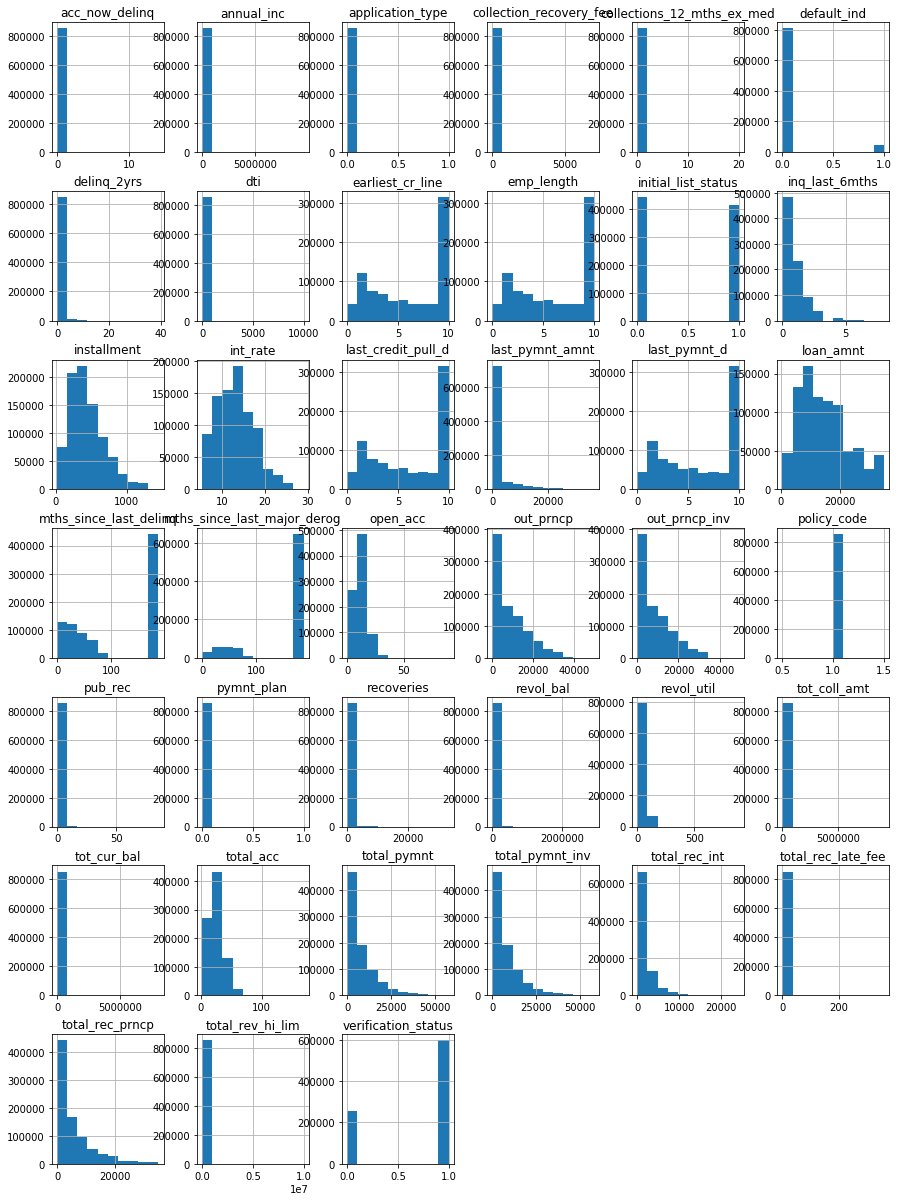

In [57]:
df.hist(figsize=(15,21))

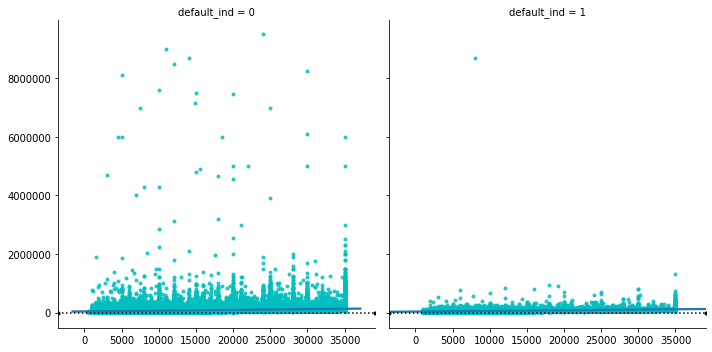

In [25]:
g = sns.lmplot('loan_amnt', 'annual_inc', col='default_ind', data=df,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

In [24]:
gg= df

# Data Processing and Data Cleaning

## id and member_id

### Removed id and member_id as they will be of no use in prediction of loan status.

In [25]:
df = df.drop(["id", "member_id"], axis=1)

### emp_title

#### has missing values and seems insignificant

In [26]:
df = df.drop([ "emp_title"], axis=1)

### ZIP code

#### The last 3 numbers of the zip code are not provided. So, dropping this.

In [27]:
df = df.drop([ "zip_code"], axis=1)

### purpose and title are similar so drop title

In [28]:
df = df.drop([ "title"], axis=1)

### loan_amnt, funded_amnt & funded_amnt_inv are almost same , so droping funded_amnt & funded_amnt_inv


In [29]:
df = df.drop(["funded_amnt",  "funded_amnt_inv"], axis=1)

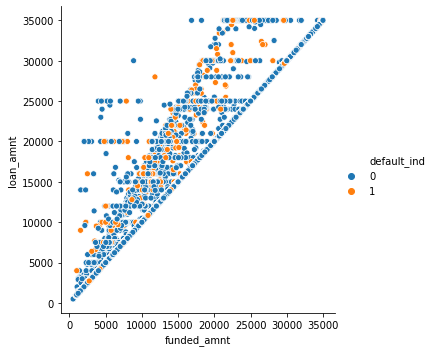

In [58]:
sns.relplot(x = 'funded_amnt', y = 'loan_amnt', hue = 'default_ind',  data = a)

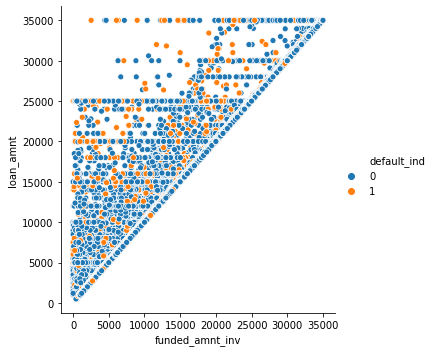

In [59]:
sns.relplot(x = 'funded_amnt_inv', y = 'loan_amnt', hue = 'default_ind',  data = a)

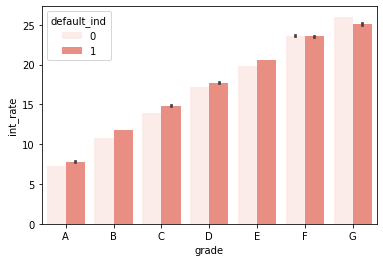

In [30]:

sns.barplot(x="grade", y="int_rate", data = df, color = "salmon" ,   hue="default_ind", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] )

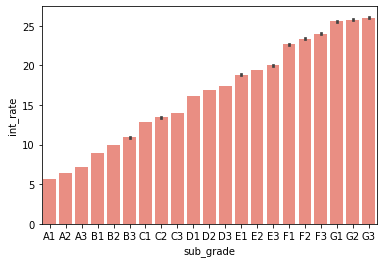

In [41]:
sns.barplot(x="sub_grade", y="int_rate" ,data = df, color = 'salmon' ,order= ["A1","A2","A3","B1","B2","B3","C1","C2","C3","D1","D2","D3","E1","E2","E3","F1","F2","F3","G1","G2","G3",])

#### grade and subgrade is almost equally proportional to int rate, so dropping these

In [30]:
df = df.drop([ "sub_grade", "grade" ], axis=1)

#### Next payment month is of no use

In [31]:
df = df.drop(["next_pymnt_d"], axis=1)

##### last_credit_pull_d,  next_pymnt_d , earliest_cr_line and emp_length are proportional to one another, so dropping 2

In [32]:
df = df.drop(["last_credit_pull_d", 'earliest_cr_line'], axis=1)

In [33]:
# Ploicy code has only single unique value, so of no use
df = df.drop(["policy_code"], axis=1)

In [34]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,36,10.65,162.87,10,RENT,24000.0,1,201112,0,credit_card,AZ,27.65,0.0,1.0,188.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,10,171.62,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0
1,2500.0,60,15.27,59.83,1,RENT,30000.0,1,201112,0,car,GA,1.00,0.0,5.0,188.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1,119.66,0.0,188.0,0,0.0,0.0,81008.5,23800.0,1
2,2400.0,36,15.96,84.33,10,RENT,12252.0,0,201112,0,small_business,IL,8.72,0.0,2.0,188.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,10,649.91,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0
3,10000.0,36,13.49,339.31,10,RENT,49200.0,1,201112,0,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,10,357.48,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0
4,3000.0,60,12.69,67.79,1,RENT,80000.0,1,201112,0,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1,67.79,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0


## 1 Hot Encoding of categorical variable purpose

In [35]:
categorical = ['purpose', 'home_ownership', 'addr_state' ]

#df = df.drop(['purpose', 'home_ownership'], axis=1)

In [36]:
df = pd.get_dummies(df, columns = categorical)


In [37]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,36,10.65,162.87,10,24000.0,1,201112,0,27.65,0.0,1.0,188.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,10,171.62,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,1,30000.0,1,201112,0,1.00,0.0,5.0,188.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,1,119.66,0.0,188.0,0,0.0,0.0,81008.5,23800.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,10,12252.0,0,201112,0,8.72,0.0,2.0,188.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,10,649.91,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,36,13.49,339.31,10,49200.0,1,201112,0,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,10,357.48,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000.0,60,12.69,67.79,1,80000.0,1,201112,0,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,1,67.79,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature selection

#### 1. Application Type

In [37]:
pd.crosstab(index= a['application_type'], columns = a['default_ind'])

default_ind,0,1
application_type,,
0,809060,46467
1,442,0


##### Joint account holder never defaulted, so it can be one good predictor

#### 2. Home ownership

In [ ]:
df.shape

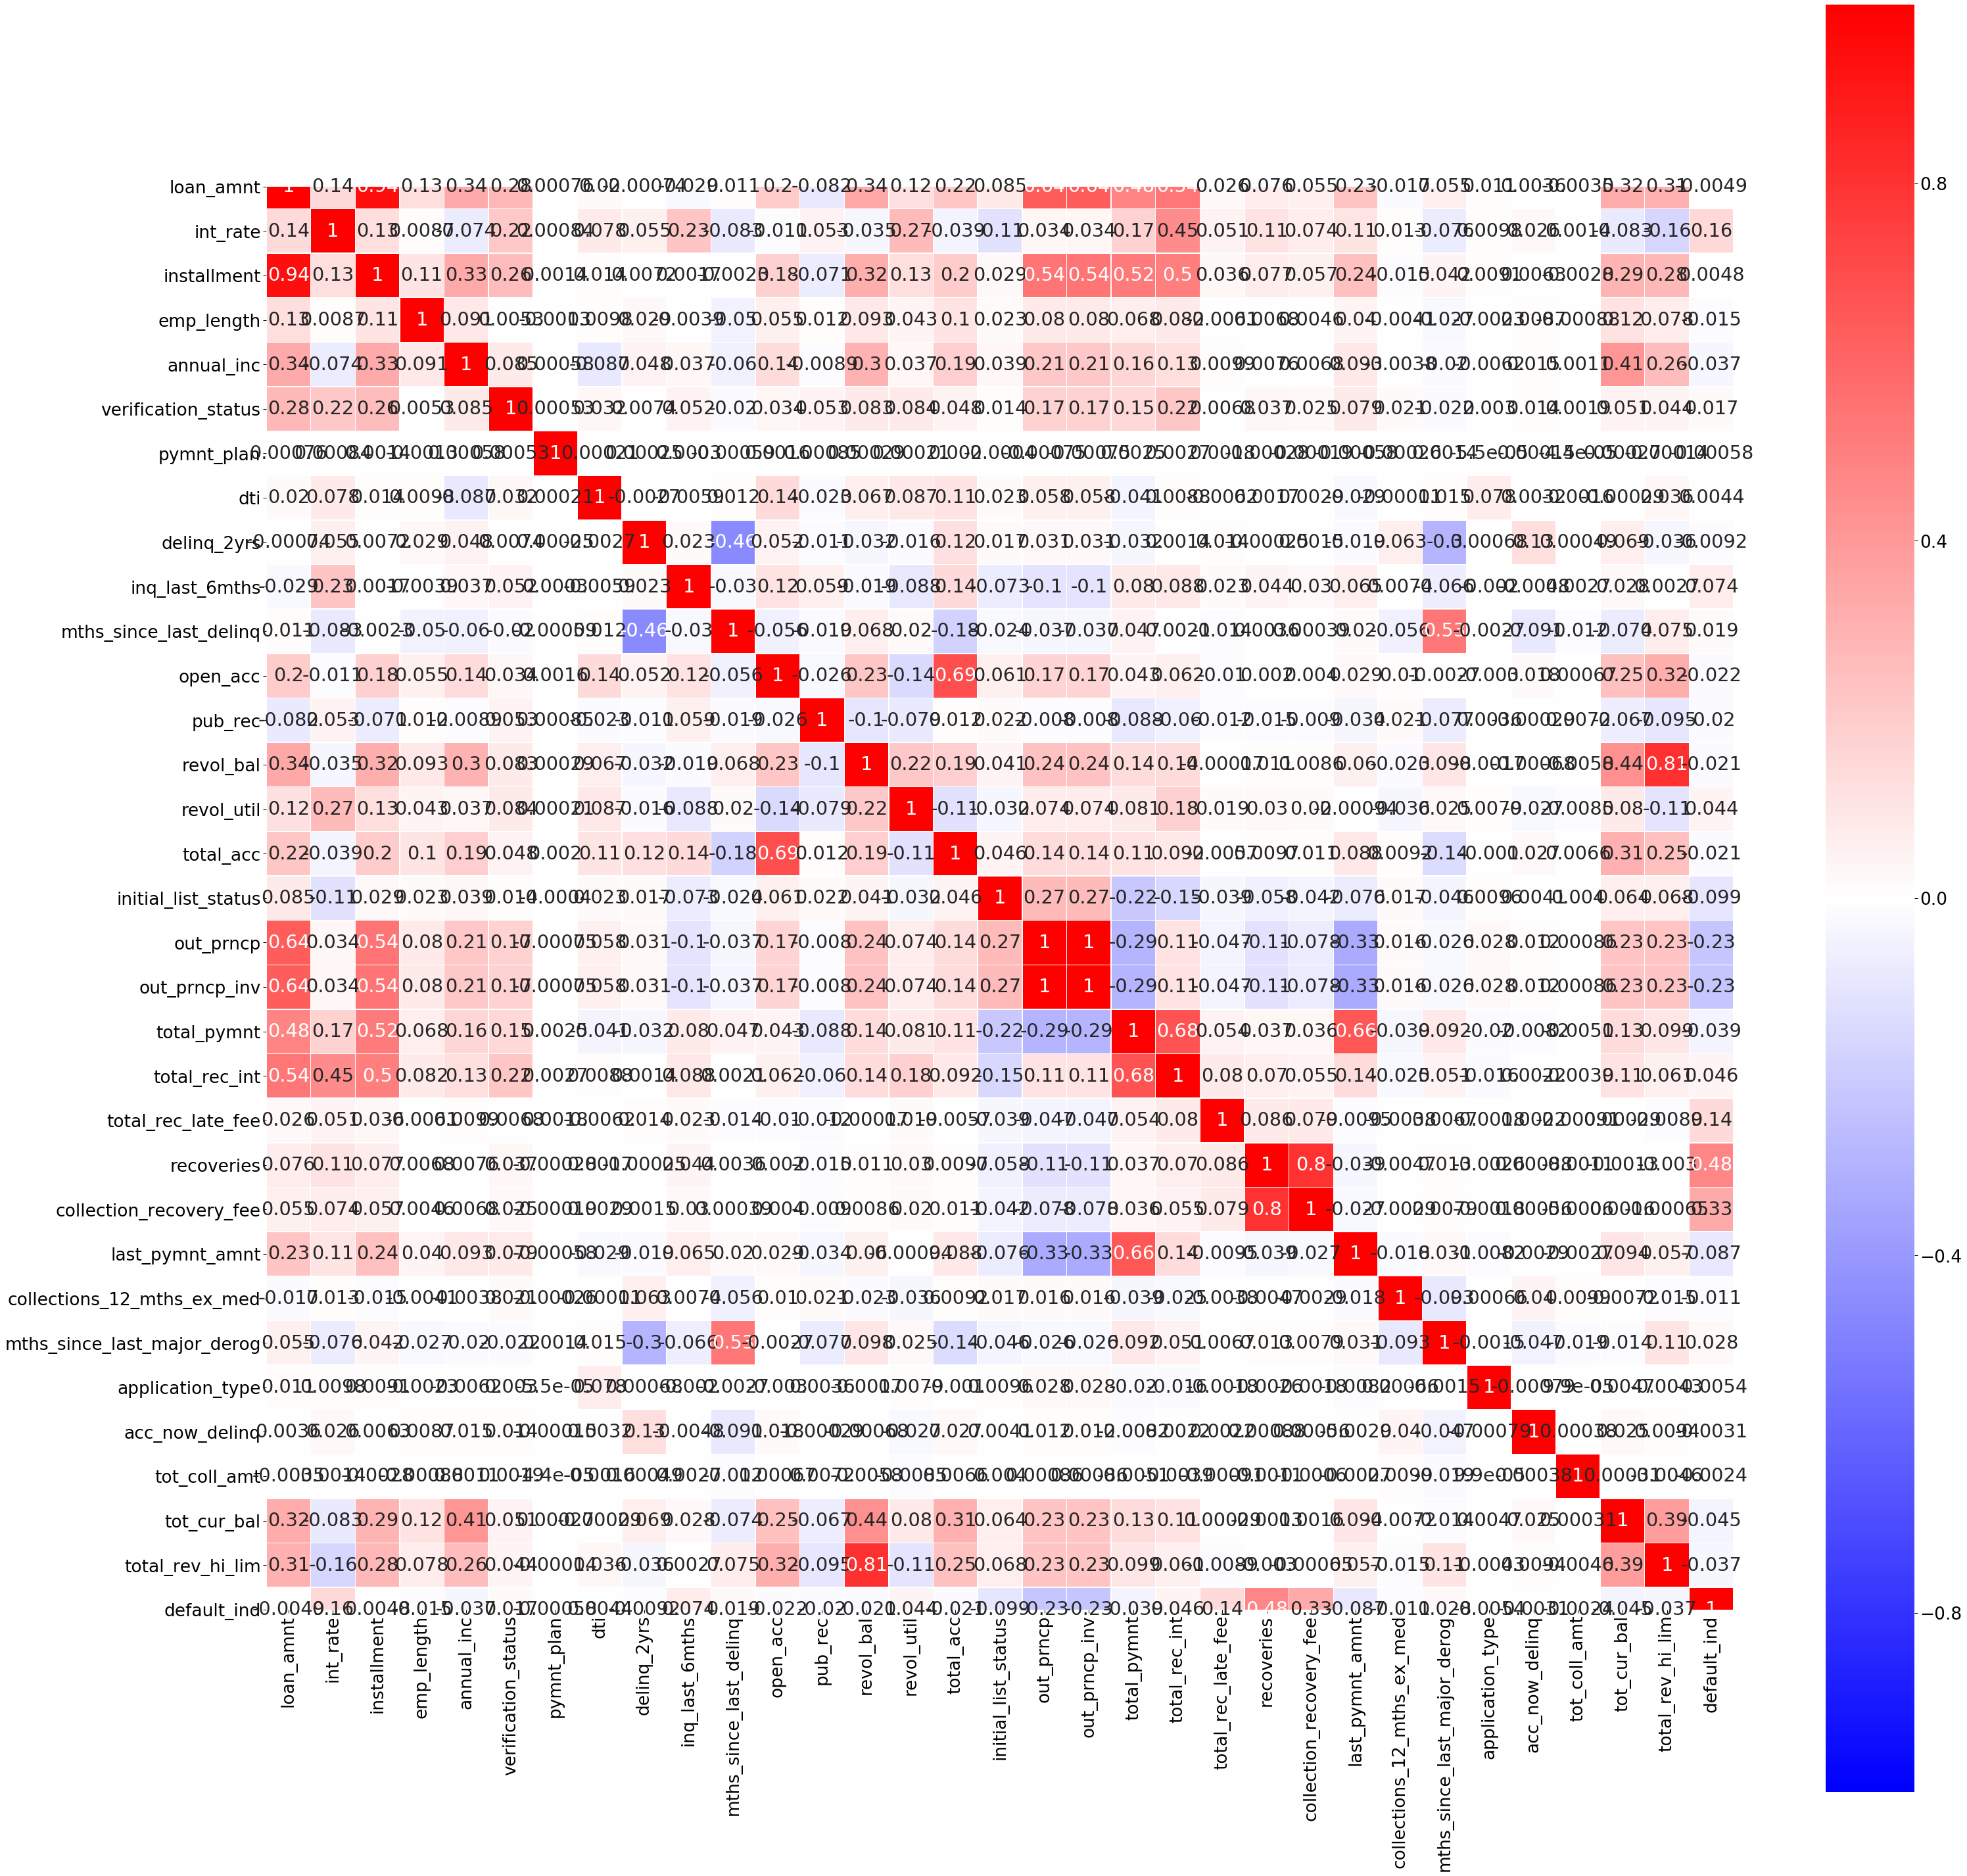

In [35]:
corrmatrix = df.corr()
plt.figure(figsize=(50,50))
sns.set_context("paper", font_scale=3)
sns.heatmap(corrmatrix,annot = True,cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.show()

In [58]:
df.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
loan_amnt,1.000000,0.999265,0.997601,0.142966,0.944870,-0.150866,0.154500,0.335209,0.279109,0.000761,0.020189,-0.000739,-0.028928,0.198926,-0.082199,0.337489,0.119586,0.222084,-0.085440,0.639784,0.639786,0.479612,0.480328,0.395880,0.537586,0.025966,0.075513,0.055135,0.233596,-0.017034,NaN,-0.011044,0.003572,-0.003539,0.324615,0.305258,-0.004907,-0.070472,0.038152,0.095388,-0.018416,-0.013660,0.001139,-0.053274,-0.066897,-0.063733,-0.129231,-0.014494,0.008414,-0.073836,-0.025865
funded_amnt,0.999265,1.000000,0.998485,0.143116,0.945903,-0.150698,0.154309,0.335002,0.278932,0.000766,0.020583,-0.000424,-0.029279,0.199432,-0.081858,0.337405,0.120098,0.222039,-0.087014,0.641706,0.641709,0.478290,0.479172,0.394669,0.536533,0.025579,0.075076,0.054898,0.233134,-0.016879,NaN,-0.011087,0.003675,-0.003509,0.325409,0.305802,-0.005797,-0.070500,0.038574,0.095632,-0.018672,-0.013851,0.000915,-0.053512,-0.066948,-0.063805,-0.129437,-0.014582,0.007244,-0.073834,-0.026197
funded_amnt_inv,0.997601,0.998485,1.000000,0.143374,0.944149,-0.149884,0.154230,0.334356,0.280207,0.000752,0.021489,0.000050,-0.030462,0.200055,-0.081008,0.336870,0.120880,0.222258,-0.090470,0.644011,0.644023,0.474600,0.478589,0.391010,0.534517,0.023091,0.073737,0.053082,0.232029,-0.016543,NaN,-0.011114,0.003856,-0.003440,0.326186,0.306143,-0.008209,-0.070563,0.039254,0.096222,-0.021073,-0.014087,0.000611,-0.053727,-0.066921,-0.063721,-0.129825,-0.014924,0.004627,-0.073661,-0.027617
int_rate,0.142966,0.143116,0.143374,1.000000,0.130468,-0.954900,-0.046825,-0.073825,0.217409,0.000844,0.078454,0.055400,0.231705,-0.011091,0.052596,-0.035344,0.271614,-0.039482,0.114943,0.033933,0.033790,0.173387,0.174453,0.059298,0.446517,0.050743,0.110848,0.074360,0.107346,0.012846,NaN,-0.009837,0.026476,0.001370,-0.082751,-0.156497,0.155037,-0.028690,-0.184109,0.097354,-0.006890,-0.012627,0.040283,-0.019022,0.029831,0.044901,0.092241,0.012551,0.072849,0.018756,0.010908
installment,0.944870,0.945903,0.944149,0.130468,1.000000,-0.127902,0.128192,0.328578,0.261919,0.001359,0.013909,0.007224,0.001659,0.183817,-0.071114,0.320017,0.131872,0.199872,-0.028699,0.539840,0.539835,0.520613,0.521332,0.455444,0.502038,0.035728,0.076931,0.057180,0.243246,-0.014558,NaN,-0.009086,0.006273,-0.002850,0.294668,0.280674,0.004753,-0.070452,0.029339,0.093716,-0.017505,-0.017684,0.006414,-0.054203,-0.063112,-0.058258,-0.117172,-0.012405,0.021514,-0.070347,-0.021942
grade,-0.150866,-0.150698,-0.149884,-0.954900,-0.127902,1.000000,0.047631,0.065362,-0.211629,-0.000782,-0.082575,-0.059946,-0.211342,0.000149,-0.060885,0.030111,-0.248209,0.034408,-0.070625,-0.112606,-0.112455,-0.087367,-0.087032,0.020454,-0.378781,-0.045327,-0.094170,-0.065834,-0.071649,-0.019601,NaN,0.013054,-0.028047,-0.001890,0.075310,0.140960,-0.123656,0.027056,0.181419,-0.092488,0.005396,0.008767,-0.039575,0.016293,-0.030342,-0.044831,-0.091818,-0.012944,-0.073957,-0.018772,-0.005933
home_ownership,0.154500,0.154309,0.154230,-0.046825,0.128192,0.047631,1.000000,0.132480,0.004815,-0.000739,-0.008967,0.038593,0.029222,0.096822,-0.007578,0.112254,0.034653,0.164783,-0.018011,0.081052,0.081062,0.099869,0.100229,0.089931,0.090026,-0.002556,0.005039,0.004861,0.059565,-0.005706,NaN,-0.006916,0.010664,0.001825,

In [13]:
# ttest

scipy.stats.ttest_ind(df.default_ind, df.annual_inc, axis=0, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-1080.764453080593, pvalue=0.0)

In [38]:
dataset =df

## Comparing mean and median 'default' status wise gives good insights

In [48]:
df.groupby(['default_ind']).mean()

,loan_amnt,int_rate,installment,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
default_ind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14755.476206,13.030057,435.960525,5.808826,75641.891696,0.697029,0.000006,18.103677,0.313508,0.663729,112.853134,11.570042,0.197269,17020.720867,54.766177,25.328980,0.494808,8742.935227,7727.617212,1732.078891,0.197805,0.000000,0.000000,2327.64342,0.014571,151.743091,1.0,0.000546,0.005002,213.583622,136752.696397,31831.005783,0.010049,0.237288,0.589255,0.000334,0.058851,0.003978,0.019393,0.009400,0.005836,0.046878,0.000611,0.010371,0.005267,0.002489,0.000004,0.504915,0.000047,0.000145,0.098827,0.396062
1,14573.018486,16.019092,441.073219,5.563217,65128.916554,0.731293,0.000000,18.444234,0.278757,0.980309,119.257882,11.061721,0.146943,14990.838574,59.439342,24.229044,0.276885,304.179196,6358.551737,2155.160268,2.440093,867.436067,91.206597,454.99824,0.008285,159.585146,1.0,0.000000,0.003938,104.953042,107147.731347,25841.620677,0.009856,0.173435,0.610950,0.001205,0.049842,0.006306,0.019110,0.012568,0.009383,0.064583,0.001162,0.029914,0.005983,0.005703,0.000000,0.438505,0.000151,0.000581,0.088988,0.471776


In [49]:
df.groupby(['default_ind']).median()

,loan_amnt,int_rate,installment,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
default_ind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13000.0,12.69,382.22,6,65000.0,1,0,17.57,0.0,0.0,188.0,11.0,0.0,11939.0,55.6,24.0,0,7000.0,4987.625,1056.46,0.0,0.00,0.0,473.42,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,12700.0,15.80,391.17,5,56000.0,1,0,18.38,0.0,1.0,188.0,10.0,0.0,11349.0,61.5,23.0,0,0.0,4855.880,1434.08,0.0,16.25,0.0,375.88,0.0,188.0,1.0,0,0.0,0.0,81008.5,23800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


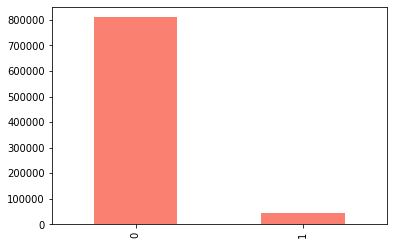

In [26]:
df['default_ind'].value_counts().plot.bar(color = 'salmon')

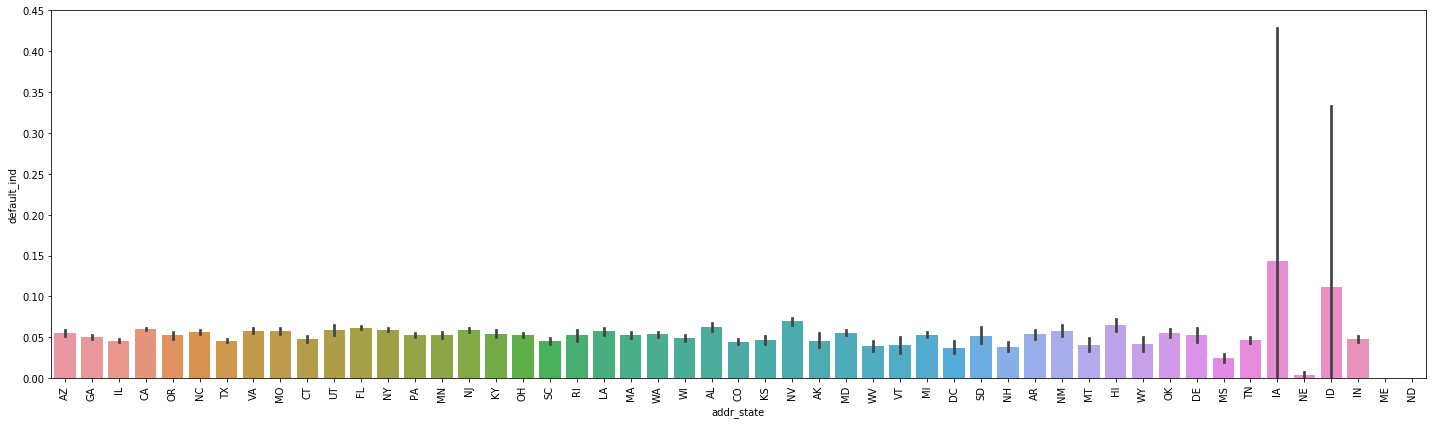

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x="addr_state", y="default_ind", data=df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [143]:
df['verification_status'].value_counts()


Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

In [38]:
df['title'].groupby(df['default_ind']).count()


default_ind
0    809471
1     46465
Name: title, dtype: int64

In [72]:
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

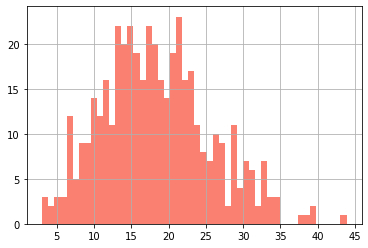

In [37]:
df['dti_joint'].hist(bins=50,color = 'salmon' )

In [335]:
df.groupby(['default_ind']).mean()

,loan_amnt,int_rate,installment,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
default_ind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14755.476206,13.030057,435.960525,6.113874,75641.891696,0.697029,0.000006,18.103677,0.313508,0.663729,32.535275,11.570042,0.197269,17020.720867,54.766177,25.328980,0.494808,8742.935227,8739.365323,7727.617212,7698.226803,5995.340518,1732.078891,0.197805,0.000000,0.000000,6.113874,2327.64342,6.113874,0.014571,44.041675,1.0,0.000546,0.005002,213.583622,136752.696397,31831.005783,0.010049,0.237288,0.589255,0.000334,0.058851,0.003978,0.019393,0.009400,0.005836,0.046878,0.000611,0.010371,0.005267,0.002489,0.000004,0.504915,0.000047,0.000145,0.098827,0.396062
1,14573.018486,16.019092,441.073219,5.904148,65128.916554,0.731293,0.000000,18.444234,0.278757,0.980309,32.464760,11.061721,0.146943,14990.838574,59.439342,24.229044,0.276885,304.179196,304.091257,6358.551737,6298.114431,3333.515304,2155.160268,2.440093,867.436067,91.206597,5.904148,454.99824,5.904148,0.008285,43.739320,1.0,0.000000,0.003938,104.953042,107147.731347,25841.620677,0.009856,0.173435,0.610950,0.001205,0.049842,0.006306,0.019110,0.012568,0.009383,0.064583,0.001162,0.029914,0.005983,0.005703,0.000000,0.438505,0.000151,0.000581,0.088988,0.471776


In [336]:
df.groupby(['default_ind']).mean()

,loan_amnt,int_rate,installment,emp_length,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
default_ind,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14755.476206,13.030057,435.960525,6.113874,75641.891696,0.697029,0.000006,18.103677,0.313508,0.663729,32.535275,11.570042,0.197269,17020.720867,54.766177,25.328980,0.494808,8742.935227,8739.365323,7727.617212,7698.226803,5995.340518,1732.078891,0.197805,0.000000,0.000000,6.113874,2327.64342,6.113874,0.014571,44.041675,1.0,0.000546,0.005002,213.583622,136752.696397,31831.005783,0.010049,0.237288,0.589255,0.000334,0.058851,0.003978,0.019393,0.009400,0.005836,0.046878,0.000611,0.010371,0.005267,0.002489,0.000004,0.504915,0.000047,0.000145,0.098827,0.396062
1,14573.018486,16.019092,441.073219,5.904148,65128.916554,0.731293,0.000000,18.444234,0.278757,0.980309,32.464760,11.061721,0.146943,14990.838574,59.439342,24.229044,0.276885,304.179196,304.091257,6358.551737,6298.114431,3333.515304,2155.160268,2.440093,867.436067,91.206597,5.904148,454.99824,5.904148,0.008285,43.739320,1.0,0.000000,0.003938,104.953042,107147.731347,25841.620677,0.009856,0.173435,0.610950,0.001205,0.049842,0.006306,0.019110,0.012568,0.009383,0.064583,0.001162,0.029914,0.005983,0.005703,0.000000,0.438505,0.000151,0.000581,0.088988,0.471776


In [12]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [13]:
median=df.revol_util.median()
median

55.9

In [39]:
df.head(20)

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,36,10.65,162.87,10,24000.00,1,201112,0,27.65,0.0,1.0,188.0,3.0,0.0,13648.0,83.70,9.0,0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,10,171.62,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,60,15.27,59.83,1,30000.00,1,201112,0,1.00,0.0,5.0,188.0,3.0,0.0,1687.0,9.40,4.0,0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,1,119.66,0.0,188.0,0,0.0,0.0,81008.5,23800.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,36,15.96,84.33,10,12252.00,0,201112,0,8.72,0.0,2.0,188.0,2.0,0.0,2956.0,98.50,10.0,0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,10,649.91,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000.0,36,13.49,339.31,10,49200.00,1,201112,0,20.00,0.0,1.0,35.0,10.0,0.0,5598.0,21.00,37.0,0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,10,357.48,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000.0,60,12.69,67.79,1,80000.00,1,201112,0,17.94,0.0,0.0,38.0,15.0,0.0,27783.0,53.90,38.0,0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,1,67.79,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5000.0,36,7.90,156.46,3,36000.00,1,201112,0,11.20,0.0,3.0,188.0,9.0,0.0,7963.0,28.30,12.0,0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,3,161.03,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7000.0,60,15.96,170.08,8,47004.00,0,201112,0,23.51,0.0,1.0,188.0,7.0,0.0,17726.0,85.60,11.0,0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,8,170.08,0.0,188.0,0,0.0,0.0,81008.5,23800.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
impute_nan(df,['revol_util', ,median)
df.head()

In [56]:
print(df['revol_util'].std())

23.80538911946644


In [216]:

df.describe(include ='all')

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969,855969.000000,8.559690e+05,855969.000000,855969,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.00000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969,855969.000000,855969,855969.000000,855969.000000,855969.000000,8.559690e+05,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000
unique,NaN,2,NaN,NaN,NaN,11,NaN,NaN,NaN,103,NaN,NaN,NaN,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36,NaN,NaN,NaN,10,NaN,NaN,NaN,201510,NaN,NaN,NaN,2001201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016201,NaN,2016201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,600221,NaN,NaN,NaN,282090,NaN,NaN,NaN,48212,NaN,NaN,NaN,60543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,467510,NaN,700147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,14745.571335,NaN,13.192320,436.238072,5.222151,NaN,5.402509,7.507119e+04,0.698889,NaN,0.000006,18.122165,0.311621,NaN,0.680915,11.542447,0.194537,1.691053e+04,55.019863,25.269269,1.517022,8284.830230,8281.449347,7653.296336,7622.22052,5850.841088,1755.046221,0.319530,47.089499,4.951227,NaN,2225.985295,NaN,0.014229,1.999484,0.004944,2.076865e+02,1.351456e+05,3.150587e+04,0.054286,0.010039,0.233822,0.590433,0.000381,0.058362,0.004104,0.019378,0.009572,0.006028,0.047839,0.000641,0.011431,0.005306,0.002664
std,8425.340005,NaN,4.368365,243.726876,1.304639,NaN,0.662414,6.426447e+04,0.458741,NaN,0.002417,17.423629,0.857189,NaN,0.964033,5.308094,0.581585,2.222374e+04,23.805389,11.818841,0.499710,8461.946669,8458.496422,7909.383591,7885.15640,6676.410888,2081.692980,3.609399,413.136043,62.478569,NaN,4864.966593,NaN,0.133707,0.022718,0.077333,1.006874e+04,1.486058e+05,3.625691e+04,0.226581,0.099690,0.423260,0.491754,0.019512,0.234427,0.063932,0.137850,0.097365,0.077408,0.213426,0.025317,0.106305,0.072651,0.051542
min,500.000000,NaN,5.320000,15.690000,1.000000,NaN,1.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,NaN,9.990000,260.550000,4.000000,NaN,5.000000,4.500000e+04,0.000000,NaN,0.000000,11.880000,0.000000,NaN,0.000000,8.000000,0.000000,6.469000e+03,37.600000,17.000000,1.000000,0.000000,0.000000,1969.690000,1960.12000,1239.950000,451.270000,0.000000,0.000000,0.000000,NaN,285.42000

In [ ]:
df.columns

In [18]:
df.groupby(['application_type']).mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind,feature,revol_util_median
application_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
INDIVIDUAL,3.222367e+07,3.474458e+07,14743.456402,14730.256555,14697.932803,13.191343,436.187735,75080.247005,18.091286,0.311608,0.680959,34.150825,70.461807,11.542808,0.194489,16911.390368,55.015124,25.269541,8279.527742,8276.154958,7656.893050,7625.801520,5853.656269,1755.803278,0.319677,47.113828,4.953785,2226.892702,0.014228,44.100697,1.0,NaN,NaN,0.004945,225.398345,139751.630879,1.073541,2.945565,0.750190,1.667854,20.834541,36490.297119,71.469695,1.356558,2.949280,5843.897574,60.952805,32167.795327,0.945868,1.524033,1.838817,0.054314,1.000000,55.015586
JOINT,6.524948e+07,6.981511e+07,18839.196833,18839.196833,18819.796380,15.082919,533.668484,57532.801018,77.889864,0.337104,0.595023,32.615063,73.257426,10.843891,0.287330,15239.393665,63.299548,24.742081,18548.226674,18529.170724,691.564774,690.903982,401.829910,289.700905,0.033937,0.000000,0.000000,469.626244,0.018100,45.395161,1.0,107412.163982,18.318477,0.002262,251.337104,165831.966063,1.000000,2.959184,0.632653,1.520408,20.649485,39370.846939,73.804651,1.051020,2.438776,5375.530612,70.677551,24636.662896,1.204082,1.551020,2.265306,0.000000,0.004525,63.299548


### Purpose of loan

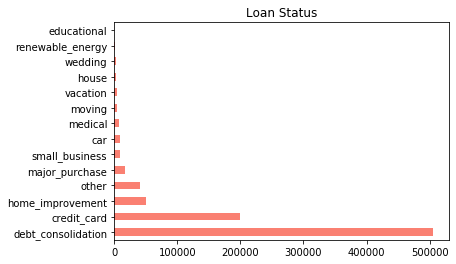

In [60]:
df['purpose'].value_counts().plot(kind= 'barh', color = 'salmon', title = 'Loan Status' )
plt.show()

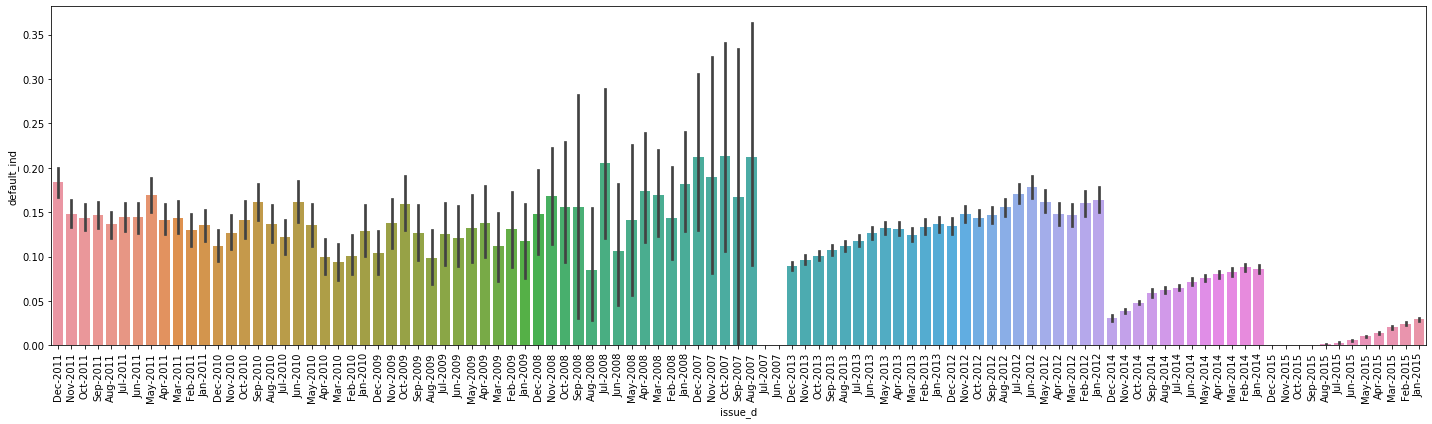

In [27]:
plt.figure(figsize=(20,6))
sns.barplot(x="issue_d", y="default_ind", data=df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

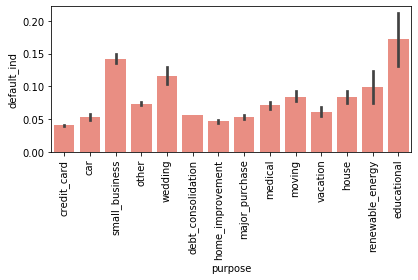

In [58]:
sns.barplot(x="purpose", y="default_ind", color = 'salmon'  , data=df )
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

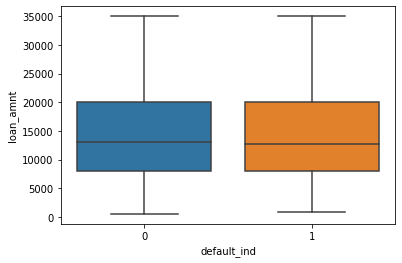

In [28]:

sns.boxplot(x='default_ind', y='loan_amnt', data = df)

default_ind
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: loan_amnt, dtype: object

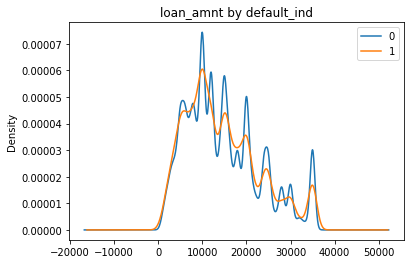

In [62]:

df.groupby('default_ind').loan_amnt.plot(kind='kde',  legend=True, title='loan_amnt by default_ind')

In [220]:
df.shape

(855969, 49)

In [68]:
df['grade'].value_counts()

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

### Selected features based multiple data and multiple approaches

In [40]:
features= ['recoveries', 'out_prncp', 'out_prncp_inv', 'tot_cur_bal', 'total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt_inv', 'total_pymnt',
'collection_recovery_fee', 'total_rev_hi_lim', 'revol_bal', 'tot_coll_amt', 'total_rec_late_fee', 'int_rate','issue_d',
'revol_util', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'installment', 'inq_last_6mths', 'term',
'initial_list_status','total_acc', 'dti', 'default_ind', 'addr_state_IA', 'addr_state_ID' ]

In [41]:
df['addr_state_IA'] = df.addr_state_IA.astype(int)
df['addr_state_ID'] = df.addr_state_ID.astype(int)

In [42]:
tf=df

In [43]:
tf.shape

(855969, 109)

In [44]:
tf = df[features] # features with target var
tf= tf.reset_index(drop=True)
print("Current shape of dataset :",tf.shape)

Current shape of dataset : (855969, 27)


In [98]:
tf.head()

,recoveries,out_prncp,out_prncp_inv,tot_cur_bal,total_rec_prncp,last_pymnt_amnt,total_pymnt_inv,total_pymnt,collection_recovery_fee,total_rev_hi_lim,revol_bal,tot_coll_amt,total_rec_late_fee,int_rate,issue_d,revol_util,mths_since_last_major_derog,mths_since_last_delinq,installment,inq_last_6mths,term,initial_list_status,total_acc,dti,default_ind,addr_state_IA,addr_state_ID
0,0.00,0.0,0.0,81008.5,5000.00,171.62,5831.78,5861.071414,0.00,23800.0,13648.0,0.0,0.00,10.65,201112,83.7,188.0,188.0,162.87,1.0,36,0,9.0,27.65,0,0,0
1,117.08,0.0,0.0,81008.5,456.46,119.66,1008.71,1008.710000,1.11,23800.0,1687.0,0.0,0.00,15.27,201112,9.4,188.0,188.0,59.83,5.0,60,0,4.0,1.00,1,0,0
2,0.00,0.0,0.0,81008.5,2400.00,649.91,3003.65,3003.653644,0.00,23800.0,2956.0,0.0,0.00,15.96,201112,98.5,188.0,188.0,84.33,2.0,36,0,10.0,8.72,0,0,0
3,0.00,0.0,0.0,81008.5,10000.00,357.48,12226.30,12226.302212,0.00,23800.0,5598.0,0.0,16.97,13.49,201112,21.0,188.0,35.0,339.31,1.0,36,0,37.0,20.00,0,0,0
4,0.00,766.9,766.9,81008.5,2233.10,67.79,3242.17,3242.170000,0.00,23800.0,27783.0,0.0,0.00,12.69,201112,53.9,188.0,38.0,67.79,0.0,60,0,38.0,17.94,0,0,0


# Split for train test

In [45]:
X = tf.loc[tf['issue_d'] < "201507" ]
Y = tf.loc[tf['issue_d'] >= "201507" ]

In [46]:
X.shape, Y.shape

((626565, 27), (229404, 27))

In [47]:
X_train = X.drop(['default_ind'],axis = 1)
y_train = X.default_ind
X_test = Y.drop(['default_ind'],axis = 1)
y_test = Y.default_ind

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((626565, 26), (626565,), (229404, 26), (229404,))

### Feature selection using selectKBest

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func = chi2, k=20)
fit = bestfeatures.fit(X_train,y_train)

dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScore = pd.concat([dfcolumns,dfscore],axis=1)
featureScore.columns = ['Specs','Score']
featureScore.head()

print(featureScore.nlargest(20,'Score'))

                          Specs         Score
0                    recoveries  5.047462e+08
1                     out_prncp  2.825697e+08
2                 out_prncp_inv  2.824898e+08
3                   tot_cur_bal  2.453940e+08
4               total_rec_prncp  1.155737e+08
5               last_pymnt_amnt  9.546733e+07
6               total_pymnt_inv  6.048077e+07
7                   total_pymnt  5.957159e+07
8       collection_recovery_fee  5.310622e+07
9              total_rev_hi_lim  3.434851e+07
10                    revol_bal  7.156942e+06
11                 tot_coll_amt  1.864266e+06
12           total_rec_late_fee  4.817571e+05
13                     int_rate  2.384832e+04
15                   revol_util  1.260399e+04
16  mths_since_last_major_derog  9.268908e+03
17       mths_since_last_delinq  9.022968e+03
18                  installment  4.839088e+03
19               inq_last_6mths  4.582624e+03
20                         term  3.292551e+03


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

### Simple Logistic Regression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#logreg.fit(X_train_smote, y_train_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[229235      9]
 [    48    112]]


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.93      0.70      0.80       160

    accuracy                           1.00    229404
   macro avg       0.96      0.85      0.90    229404
weighted avg       1.00      1.00      1.00    229404



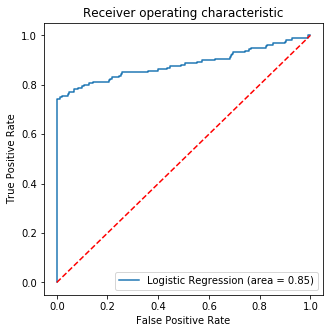

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Balancing imbalanced data set

In [53]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [54]:

smote = SMOTE( sampling_strategy=0.5)

In [55]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [56]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 580258, 1: 46307})
After SMOTE : Counter({0: 580258, 1: 290129})


### Logistic regression after  balancing

In [57]:
logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
logreg.fit(X_train_smote, y_train_smote)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[227313   1931]
 [    38    122]]


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    229244
           1       0.06      0.76      0.11       160

    accuracy                           0.99    229404
   macro avg       0.53      0.88      0.55    229404
weighted avg       1.00      0.99      1.00    229404



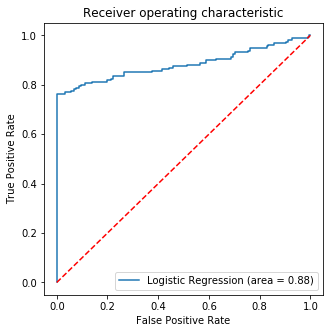

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Logistic regression with gridsearch

In [61]:
clf_logistic = LogisticRegression(solver='lbfgs')

In [62]:
clf_logistic.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [63]:
preds = clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.65 else 0)

In [66]:
print(confusion_matrix(y_test, preds_df['loan_status']))
print(accuracy_score(y_test,preds_df['loan_status']))
print(classification_report(y_test, preds_df['loan_status']))


[[228941    303]
 [    39    121]]
0.9985091803107182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.29      0.76      0.41       160

    accuracy                           1.00    229404
   macro avg       0.64      0.88      0.71    229404
weighted avg       1.00      1.00      1.00    229404



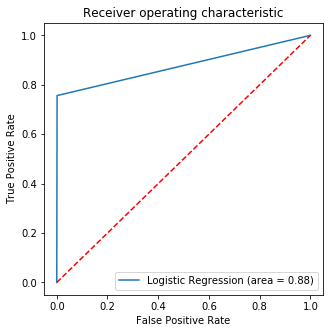

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, preds_df['loan_status'])
fpr, tpr, thresholds = roc_curve(y_test, preds_df['loan_status'])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random forest

In [68]:
class_weight = dict({0:1,1:100})

In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 8)
classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=8)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [70]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[208735  20509]
 [    24    136]]
0.9104941500584123
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    229244
           1       0.01      0.85      0.01       160

    accuracy                           0.91    229404
   macro avg       0.50      0.88      0.48    229404
weighted avg       1.00      0.91      0.95    229404



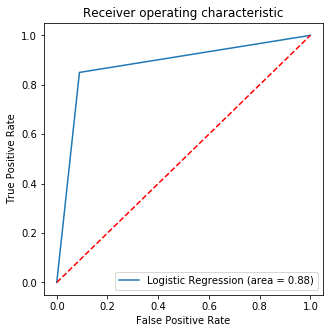

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Random_forest_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % Random_forest_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  Navie bias

In [72]:
# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train_smote, y_train_smote) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 99.93199769838364


In [73]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[229234     10]
 [   146     14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.58      0.09      0.15       160

    accuracy                           1.00    229404
   macro avg       0.79      0.54      0.58    229404
weighted avg       1.00      1.00      1.00    229404



### SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_smote, y_train_smote)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

### KNN without balancing

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[228907    337]
 [    86     74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229244
           1       0.18      0.46      0.26       160

    accuracy                           1.00    229404
   macro avg       0.59      0.73      0.63    229404
weighted avg       1.00      1.00      1.00    229404



### KNN with balancing

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_smote, y_train_smote)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))